In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delhi = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_1/Delhi.csv')
mumbai = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_2/Mumbai.csv')
kolkata = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_2/Kolkata.csv')
chennai = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_1/Chennai.csv')
bhopal = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_1/Bhopal.csv')
jodhpur = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_2/Jodhpur.csv')
guwahati = pd.read_csv('/kaggle/input/indian-5000-cities-weather-data/w_d_1/Guwahati.csv')

In [3]:
delhi.head()

Unnamed: 0                       date  temperature_2m  \
0           0  2010-01-01 00:00:00+00:00        9.197500   
1           1  2010-01-01 01:00:00+00:00        8.947500   
2           2  2010-01-01 02:00:00+00:00        8.747499   
3           3  2010-01-01 03:00:00+00:00       10.697500   
4           4  2010-01-01 04:00:00+00:00       14.597500   

   relative_humidity_2m  dew_point_2m  apparent_temperature  precipitation  \
0             84.366330        6.6975              6.832026            0.0   
1             86.390884        6.7975              6.744591            0.0   
2             88.168060        6.8975              6.663919            0.0   
3             80.329120        7.4475              8.573552            0.0   
4             65.918220        8.2975             12.873964            0.0   

   rain  snowfall  snow_depth  ...  surface_pressure  cloud_cover  \
0   0.0       0.0         0.0  ...         989.11890          0.0   
1   0.0       0.0         0.0  ...         989.58360          0.0   
2   0.0       0.0         0.0  ...         990.24770          0.0   
3   0.0       0.0         0.0  ...         991.39790          0.0   
4   0.0       0.0         0.0  ...         992.52216          0.0   

   cloud_cover_low  cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
0              0.0              0.0               0.0       10.464797   
1              0.0              0.0               0.0        9.511088   
2              0.0              0.0               0.0        8.854829   
3              0.0              0.0               0.0       10.041354   
4              0.0              0.0               0.0        8.759178   

   wind_speed_100m  wind_direction_10m  wind_direction_100m  wind_gusts_10m  
0        25.161400           296.56497            303.91745       16.919998  
1        23.904108           299.47580            307.04254       16.919998  
2        22.608458           296.56497            307.23492       15.840000  
3        19.022177           284.53450            299.47580       18.720000  
4        13.009903           279.46225            284.42080       19.440000  

[5 rows x 21 columns]

In [4]:
# Function to perform EDA and extract useful time-based features
def perform_eda(df, city_name):
    # Basic overview of the data
    print(f"--- EDA for {city_name} ---")
    
    # Convert 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract useful time-based features from 'date'
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    df['rain_today'] = df['precipitation'].apply(lambda x: 1 if x > 0 else 0)

    # Add the 'rain_tom' column by shifting 'rain_today' to the next day
    df['rain_tom'] = df['rain_today'].shift(-1, fill_value=0)
    
    # Add the 'rain_amount_tom' column by shifting 'precipitation' to the next day
    df['rain_amount_tom'] = df['precipitation'].shift(-1, fill_value=0)

    # Drop features that aren't useful for rainfall prediction
    drop_columns = [
    'rain', 'snowfall', 'snow_depth', 'cloud_cover_low', 
    'cloud_cover_mid', 'cloud_cover_high', 'date', 'Unnamed: 0',
    'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 
    'wind_direction_100m', 'wind_gusts_10m', 'pressure_msl', 'surface_pressure'
    ]
    df_cleaned = df.drop(columns=drop_columns, errors='ignore')
    
    print(f"Shape of data: {df_cleaned.shape}")
    print(f"First 5 rows of data:\n{df_cleaned.head()}")

    # Checking correlation with 'precipitation' (which can be used for rainfall prediction)
    corr_matrix = df_cleaned.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for {city_name}")
    plt.show()

    return df_cleaned


--- EDA for Delhi ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0        9.197500             84.366330        6.6975              6.832026   
1        8.947500             86.390884        6.7975              6.744591   
2        8.747499             88.168060        6.8975              6.663919   
3       10.697500             80.329120        7.4475              8.573552   
4       14.597500             65.918220        8.2975             12.873964   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0          0.0  2010      1    1           0         0   
1            0.0          0.0  2010      1    1           0         0   
2            0.0          0.0  2010      1    1           0         0   
3            0.0          0.0  2010      1    1           0         0   
4            0.0          0.0  2010      1    1           0         0   

   rain_amount

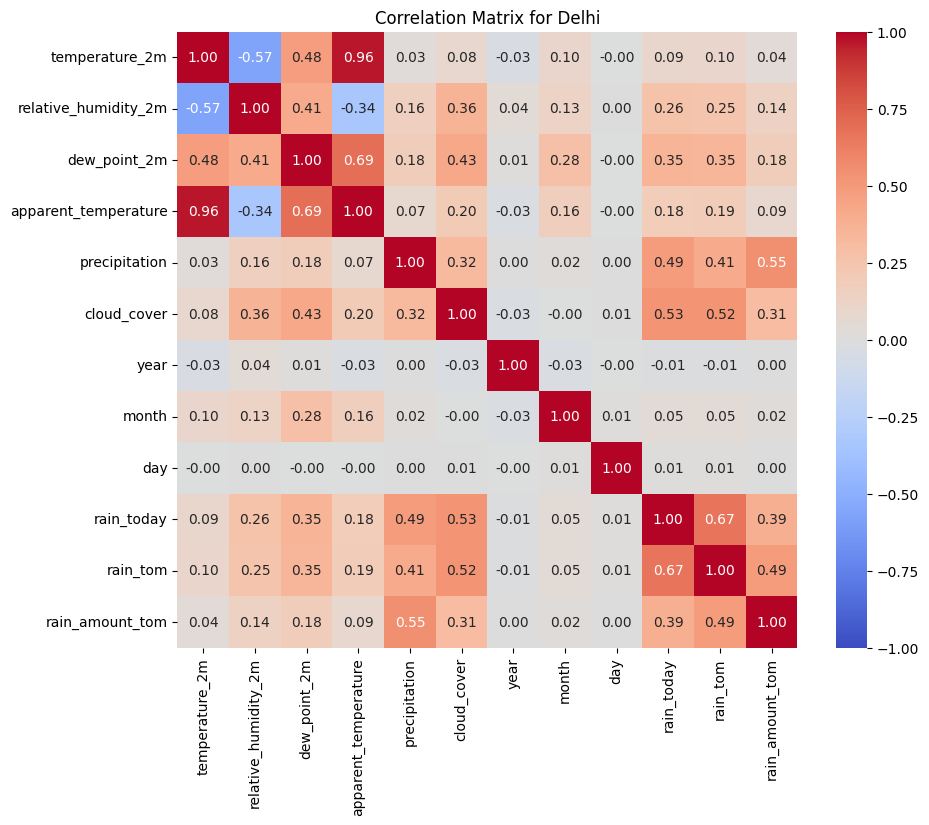

In [5]:
# Applying the function to all city dataframes
delhi_cleaned = perform_eda(delhi, 'Delhi')

--- EDA for Mumbai ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0          20.654             69.173140        14.804             21.001402   
1          20.404             70.247740        14.804             20.702806   
2          20.304             71.139520        14.904             20.624790   
3          21.504             66.079490        14.904             21.591595   
4          23.954             56.590042        14.804             24.173029   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0     0.000000  2010      1    1           0         0   
1            0.0     0.600000  2010      1    1           0         0   
2            0.0     5.100000  2010      1    1           0         0   
3            0.0    11.400001  2010      1    1           0         0   
4            0.0    21.600000  2010      1    1           0         0   

   rain_amoun

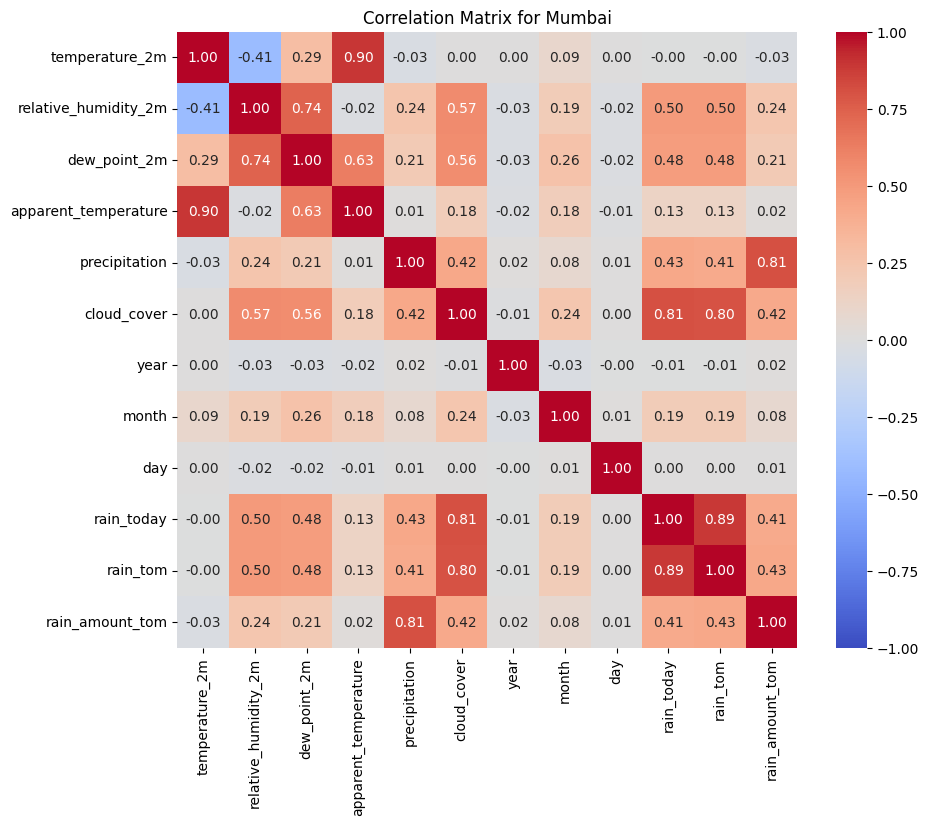

In [6]:
mumbai_cleaned = perform_eda(mumbai, 'Mumbai')

--- EDA for Kolkata ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0       13.261001             88.557915     11.411000             12.383568   
1       12.861000             89.706085     11.211000             11.921970   
2       14.511001             80.583890     11.211000             13.359142   
3       17.461000             63.716255     10.511001             15.993464   
4       19.661001             51.233540      9.311001             17.586372   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0          0.0  2010      1    1           0         0   
1            0.0          0.0  2010      1    1           0         0   
2            0.0          0.0  2010      1    1           0         0   
3            0.0          0.0  2010      1    1           0         0   
4            0.0          0.0  2010      1    1           0         0   

   rain_amou

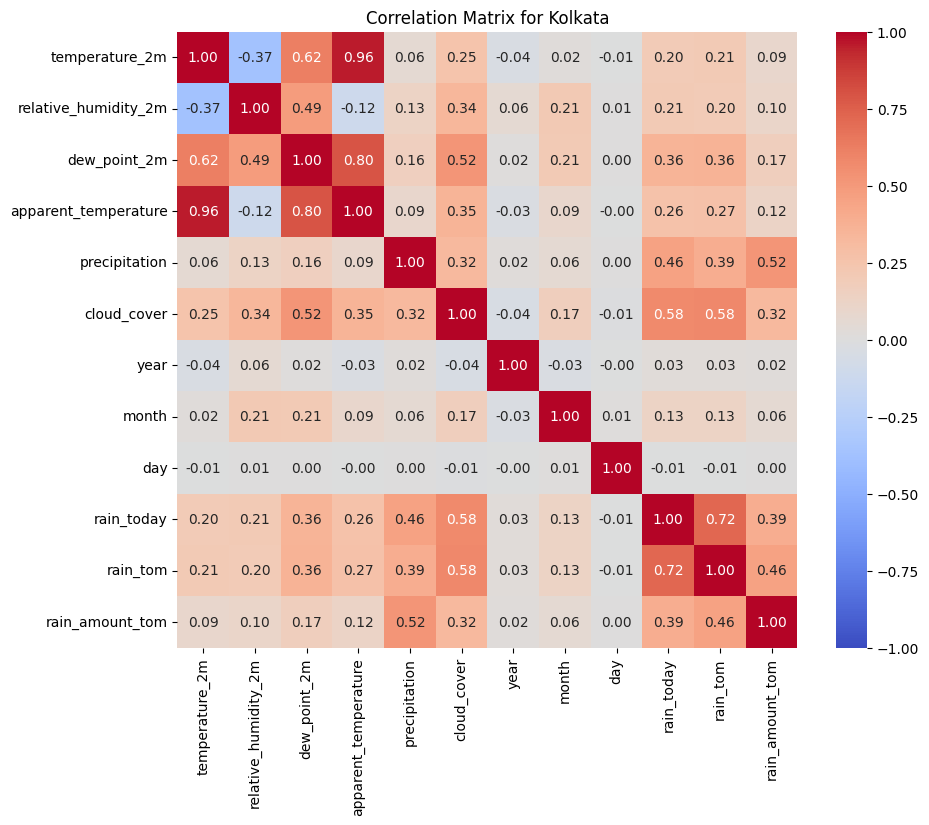

In [7]:
kolkata_cleaned = perform_eda(kolkata, 'Kolkata')

--- EDA for Chennai ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0          21.063             94.312836     20.113000             24.068504   
1          21.113             94.023710     20.113000             24.021393   
2          22.263             92.357270     20.963001             25.354164   
3          24.913             82.429886     21.713001             28.040882   
4          26.413             71.581930     20.863000             28.551857   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0     0.000000  2010      1    1           0         0   
1            0.0     5.400000  2010      1    1           0         0   
2            0.0     7.200000  2010      1    1           0         0   
3            0.0    22.500000  2010      1    1           0         0   
4            0.0    21.599998  2010      1    1           0         0   

   rain_amou

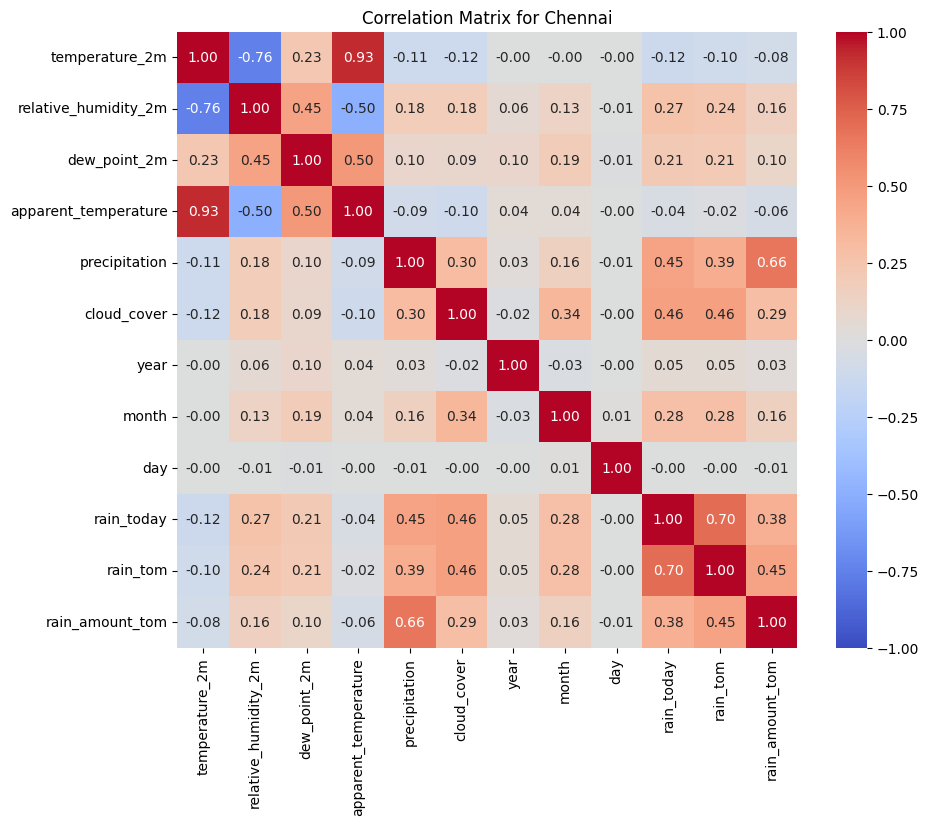

In [8]:
chennai_cleaned = perform_eda(chennai, 'Chennai')

--- EDA for Bhopal ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0           9.048              83.77097         6.448              6.990868   
1           8.698              85.18514         6.348              6.617842   
2           8.448              86.93715         6.398              6.529211   
3          11.848              81.03490         8.698             10.346947   
4          16.248              58.89934         8.198             14.568434   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0          0.0  2010      1    1           0         0   
1            0.0          0.0  2010      1    1           0         0   
2            0.0          0.0  2010      1    1           0         0   
3            0.0          0.0  2010      1    1           0         0   
4            0.0          0.0  2010      1    1           0         0   

   rain_amoun

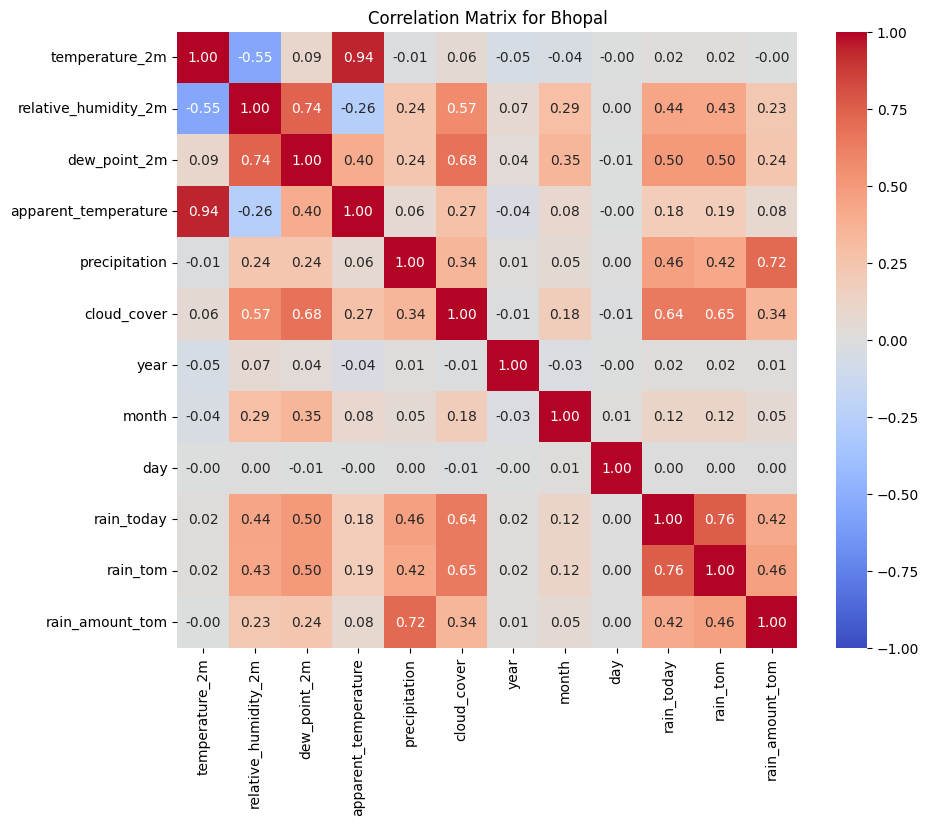

In [9]:
bhopal_cleaned = perform_eda(bhopal, 'Bhopal')

--- EDA for Jodhpur ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0       10.039000             55.134285         1.439              6.808899   
1        9.639000             56.226950         1.339              6.302382   
2        9.389000             56.770130         1.239              6.001307   
3       10.738999             52.619415         1.439              7.353219   
4       15.089000             41.771862         2.189             11.977171   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0          0.0  2010      1    1           0         0   
1            0.0          0.0  2010      1    1           0         0   
2            0.0          0.0  2010      1    1           0         0   
3            0.0          0.0  2010      1    1           0         0   
4            0.0          0.0  2010      1    1           0         0   

   rain_amou

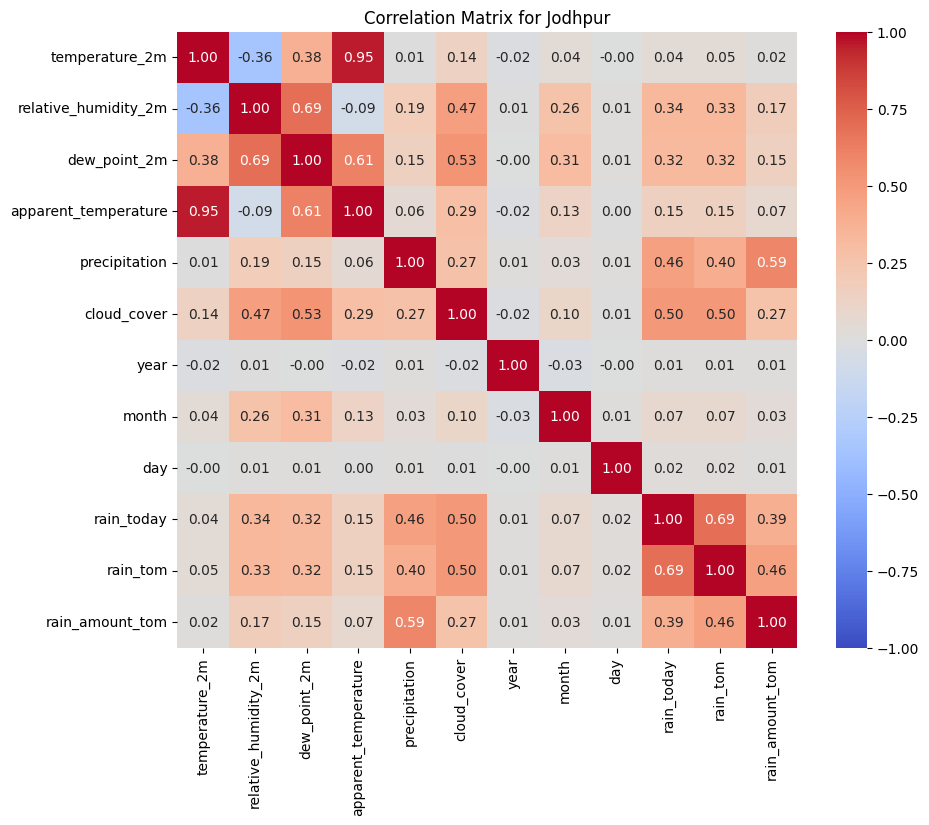

In [10]:
jodhpur_cleaned = perform_eda(jodhpur, 'Jodhpur')

--- EDA for Guwahati ---
Shape of data: (123936, 12)
First 5 rows of data:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0       13.528000             96.792560        13.028             13.747213   
1       13.278000             96.786385        12.778             13.251965   
2       13.978000             95.862404        13.328             14.262150   
3       17.477999             78.907875        13.778             17.970110   
4       19.078000             68.191970        13.078             19.489529   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0     7.500000  2010      1    1           0         0   
1            0.0     9.300000  2010      1    1           0         0   
2            0.0    13.500000  2010      1    1           0         0   
3            0.0    13.500000  2010      1    1           0         0   
4            0.0    23.099998  2010      1    1           0         0   

   rain_amo

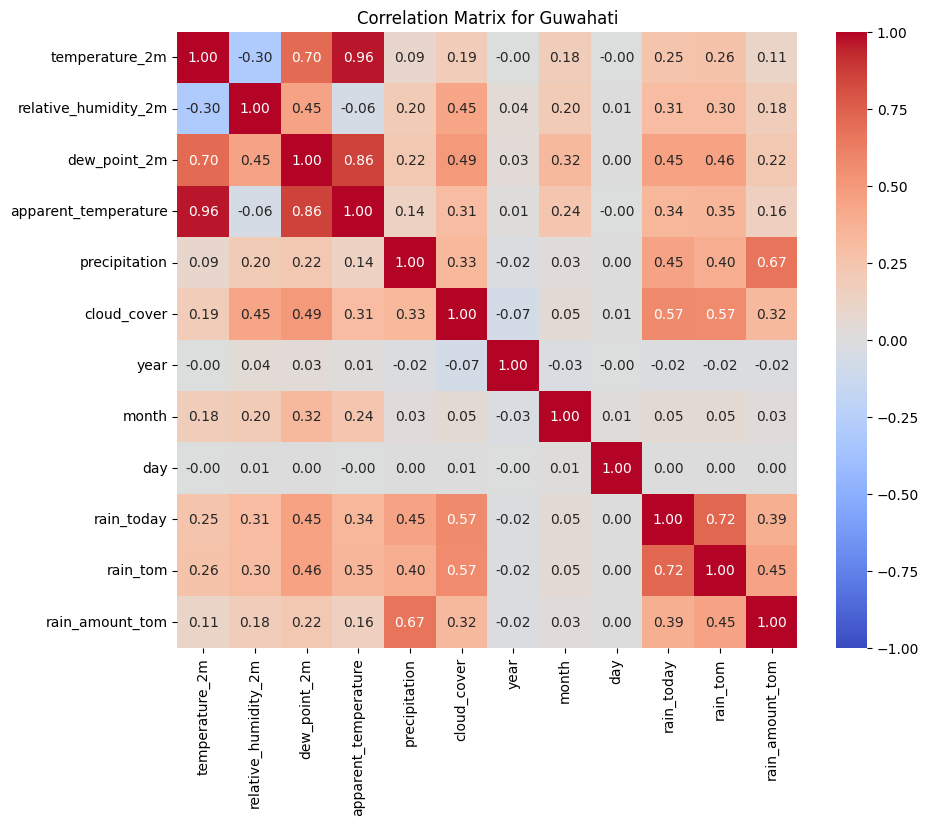

In [11]:
guwahati_cleaned = perform_eda(guwahati, 'Guwahati')

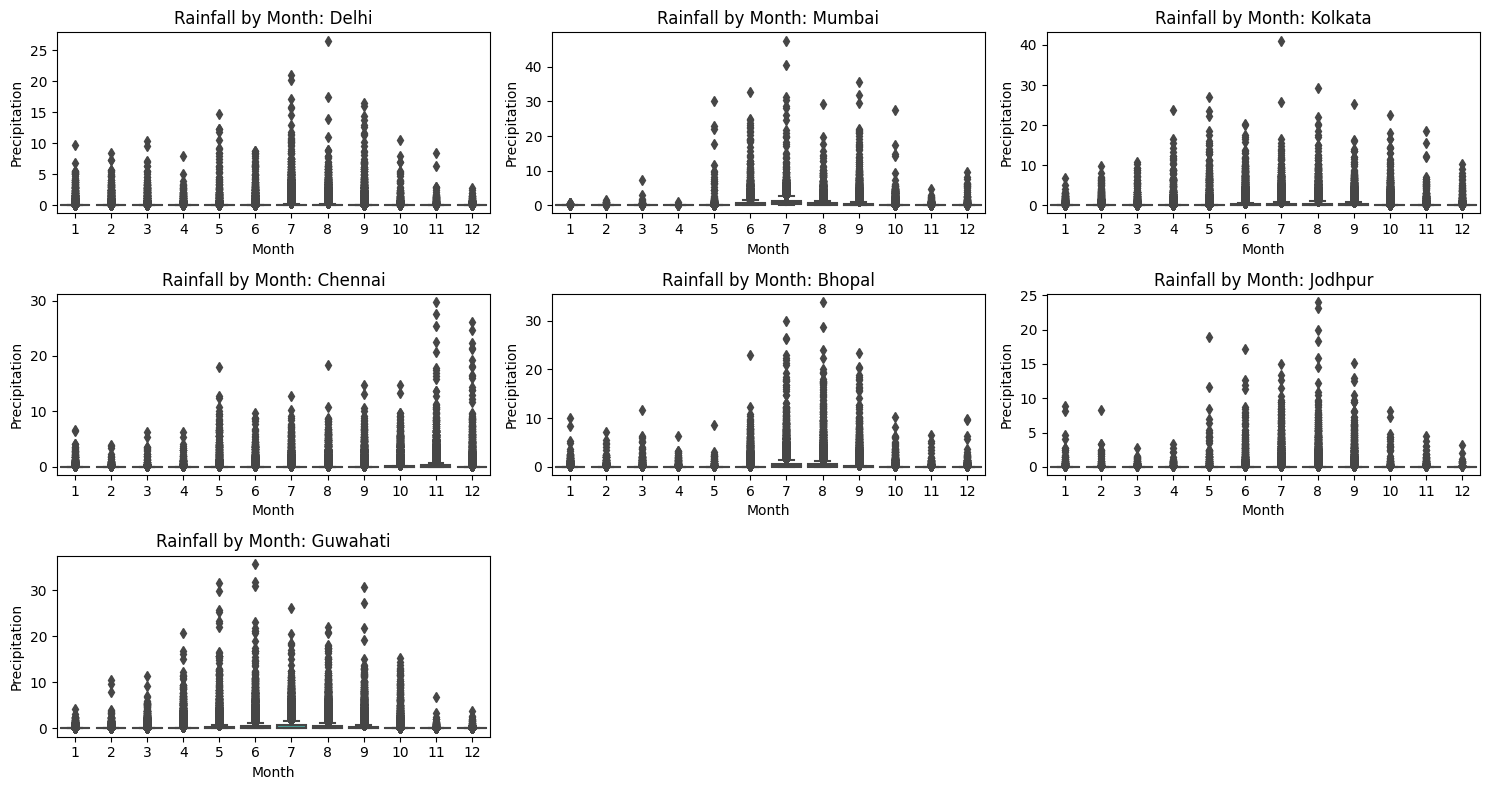

In [12]:
# List of cleaned dataframes for each city
cities_data = [delhi_cleaned, mumbai_cleaned, kolkata_cleaned, chennai_cleaned, bhopal_cleaned, jodhpur_cleaned, guwahati_cleaned]
city_names = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bhopal', 'Jodhpur', 'Guwahati']

# Function to plot rainfall distribution by month for each city
def plot_rainfall_by_month(cities_data, city_names):
    plt.figure(figsize=(15, 8))
    
    for i, df in enumerate(cities_data):
        plt.subplot(3, 3, i+1)  # Create a grid of subplots (3x3 for 7 cities)
        sns.boxplot(x='month', y='precipitation', data=df)
        plt.title(f'Rainfall by Month: {city_names[i]}')
        plt.xlabel('Month')
        plt.ylabel('Precipitation')
        
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_rainfall_by_month(cities_data, city_names)


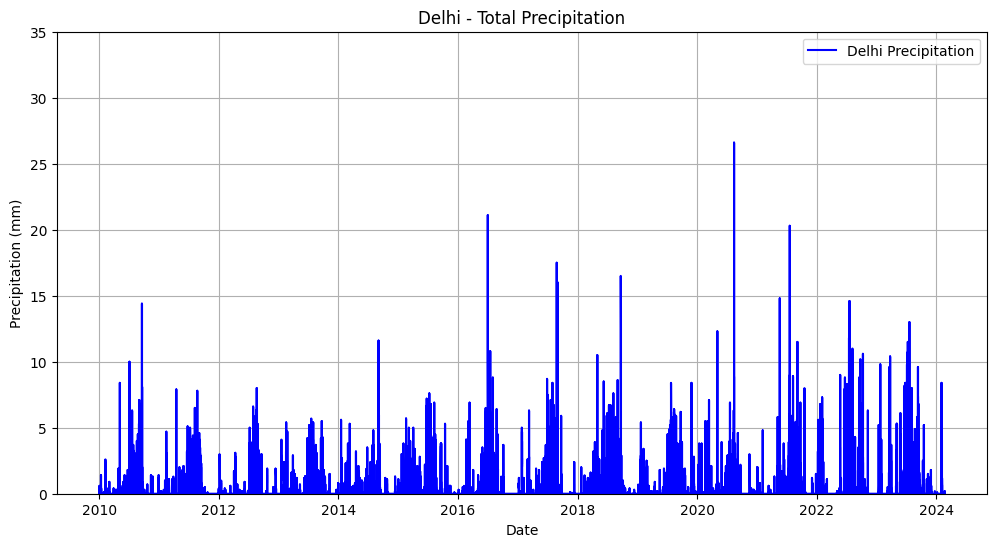

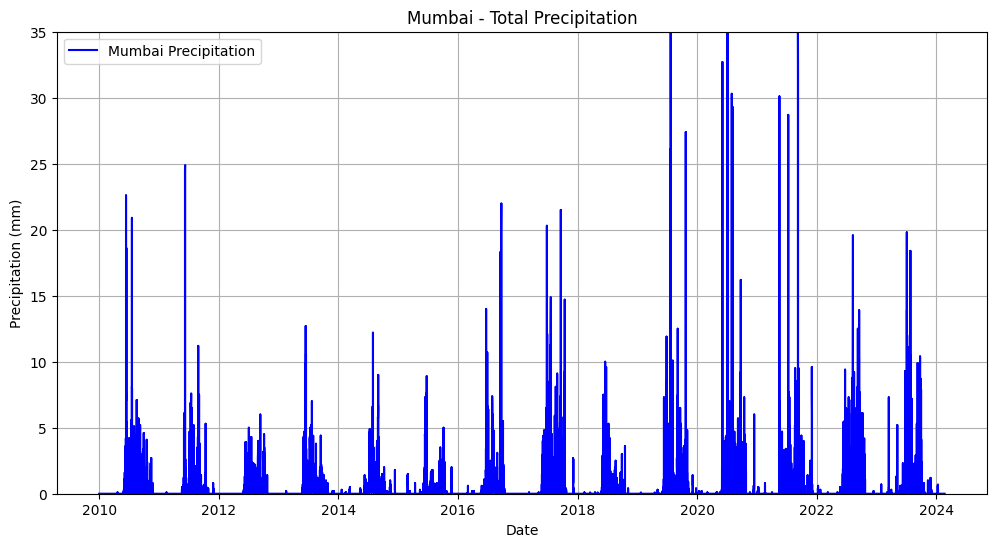

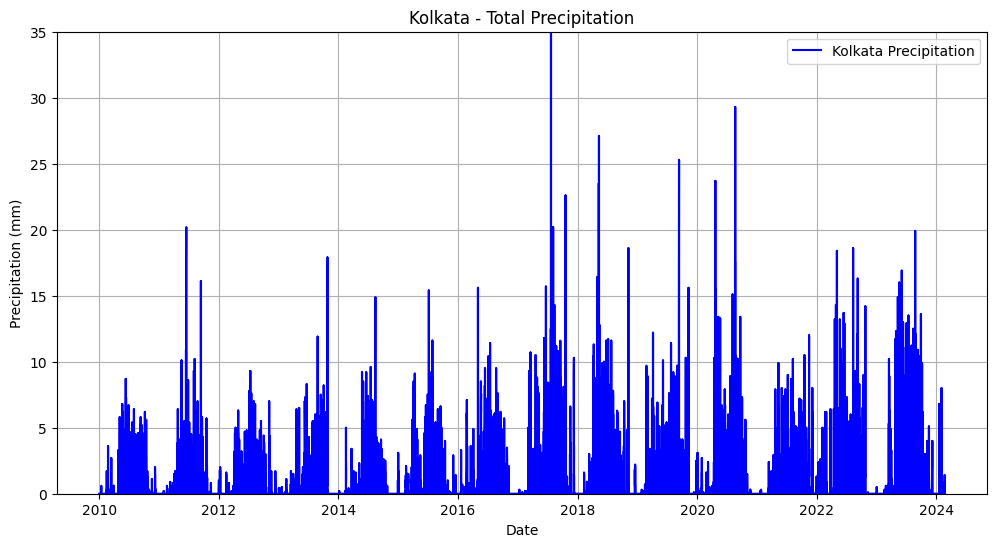

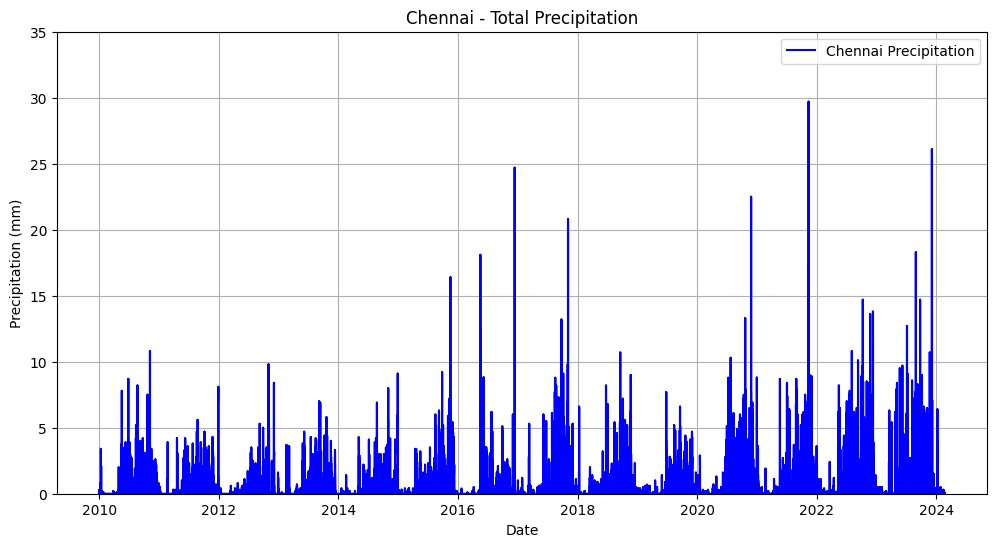

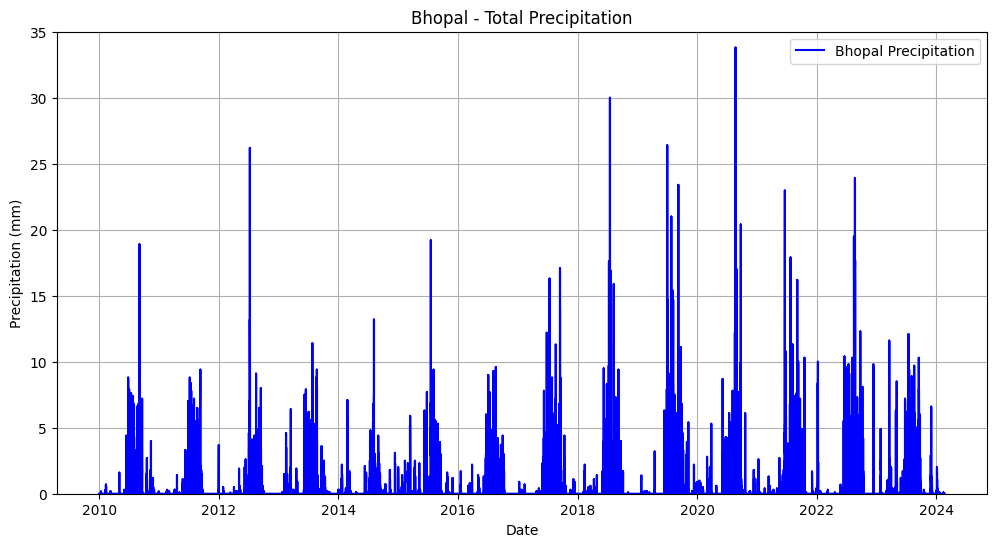

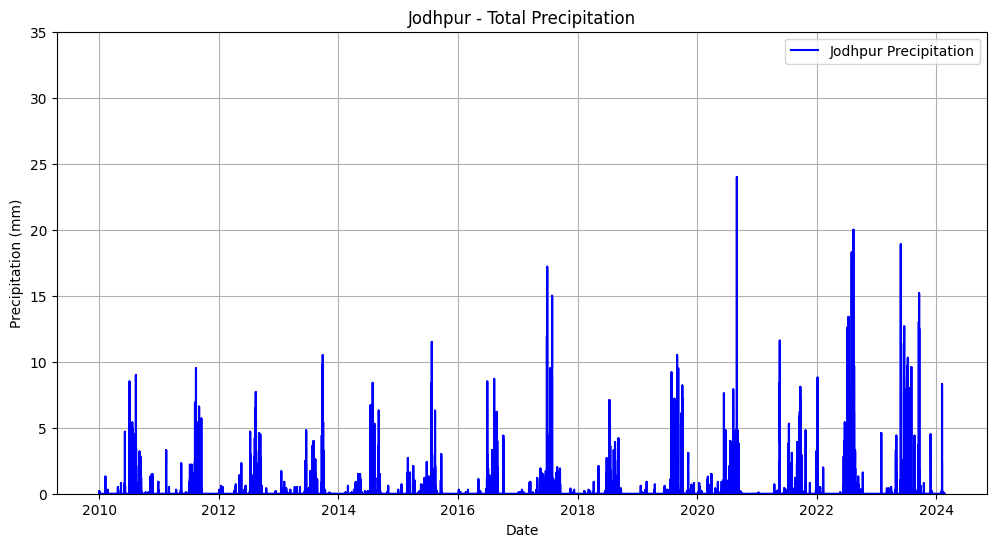

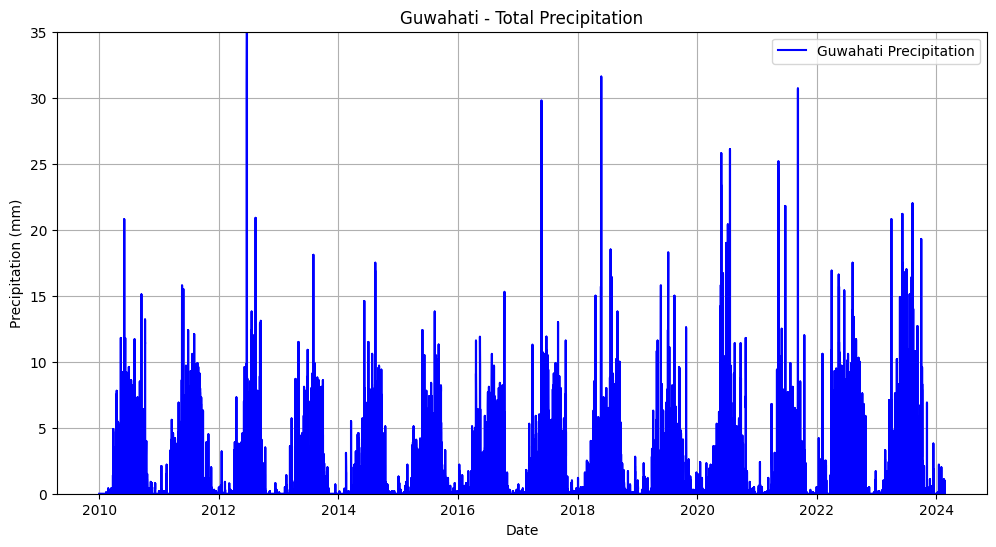

In [13]:
# List of city cleaned datasets (replace with actual city dataframes)
city_datasets = [delhi_cleaned, mumbai_cleaned, kolkata_cleaned, chennai_cleaned, bhopal_cleaned, jodhpur_cleaned, guwahati_cleaned]
city_names = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bhopal', 'Jodhpur', 'Guwahati']

# Function to plot precipitation for each city
def plot_precipitation_for_city(city_data, city_name):
    city_data['date'] = pd.to_datetime(city_data[['year', 'month', 'day']])  # Ensure date is in datetime format
    plt.figure(figsize=(12, 6))
    plt.plot(city_data['date'], city_data['precipitation'], label=f'{city_name} Precipitation', color='blue')  # Plot precipitation
    plt.fill_between(city_data['date'], city_data['precipitation'], alpha=0.3, color='blue')  # Fill the area under the precipitation curve
    plt.title(f'{city_name} - Total Precipitation')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    plt.legend()
    plt.ylim(0, 35)  # Set the y-axis limit to 0-35, adjust as needed
    plt.grid(True)
    plt.show()

# Plot for each city
for city_data, city_name in zip(city_datasets, city_names):
    plot_precipitation_for_city(city_data, city_name)


In [14]:
for city_data in city_datasets:
    city_data = city_data.drop(columns=['date'], inplace=True)

In [15]:
delhi_cleaned.head()

temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0        9.197500             84.366330        6.6975              6.832026   
1        8.947500             86.390884        6.7975              6.744591   
2        8.747499             88.168060        6.8975              6.663919   
3       10.697500             80.329120        7.4475              8.573552   
4       14.597500             65.918220        8.2975             12.873964   

   precipitation  cloud_cover  year  month  day  rain_today  rain_tom  \
0            0.0          0.0  2010      1    1           0         0   
1            0.0          0.0  2010      1    1           0         0   
2            0.0          0.0  2010      1    1           0         0   
3            0.0          0.0  2010      1    1           0         0   
4            0.0          0.0  2010      1    1           0         0   

   rain_amount_tom  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

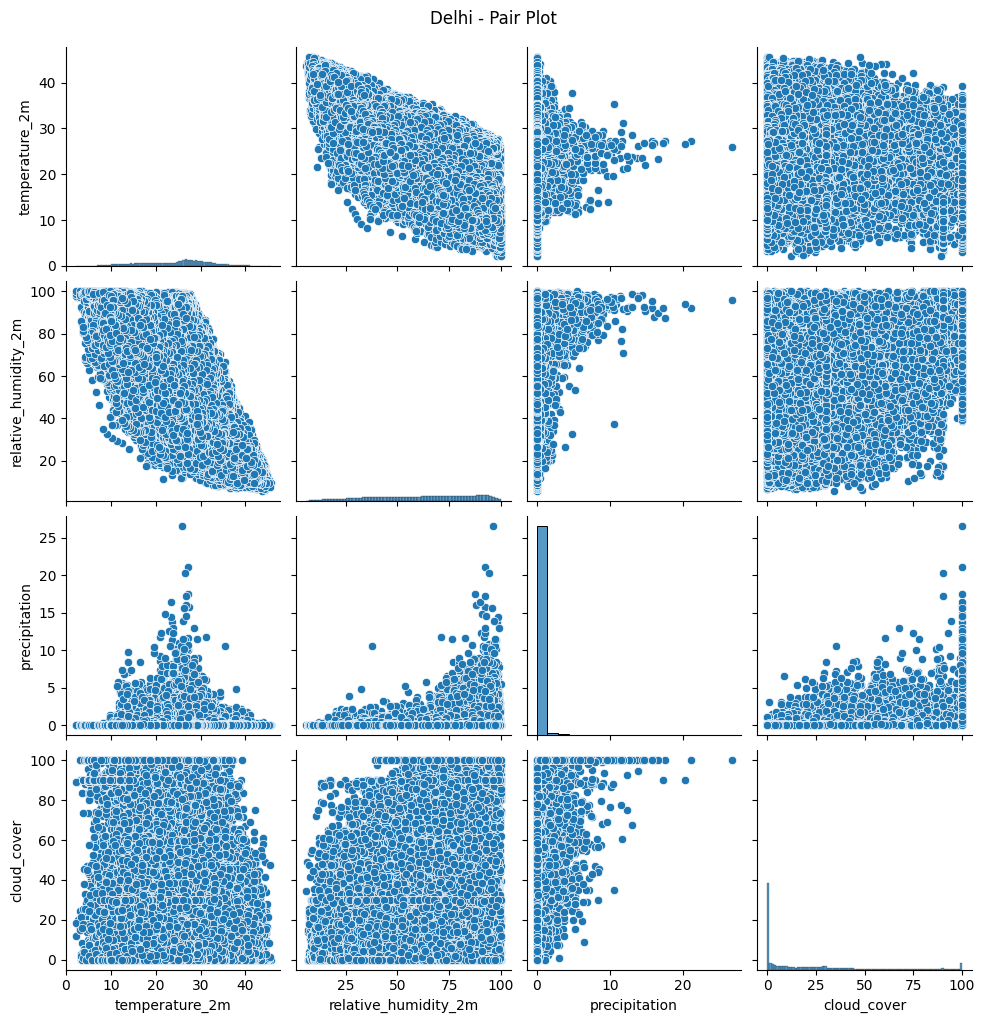

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

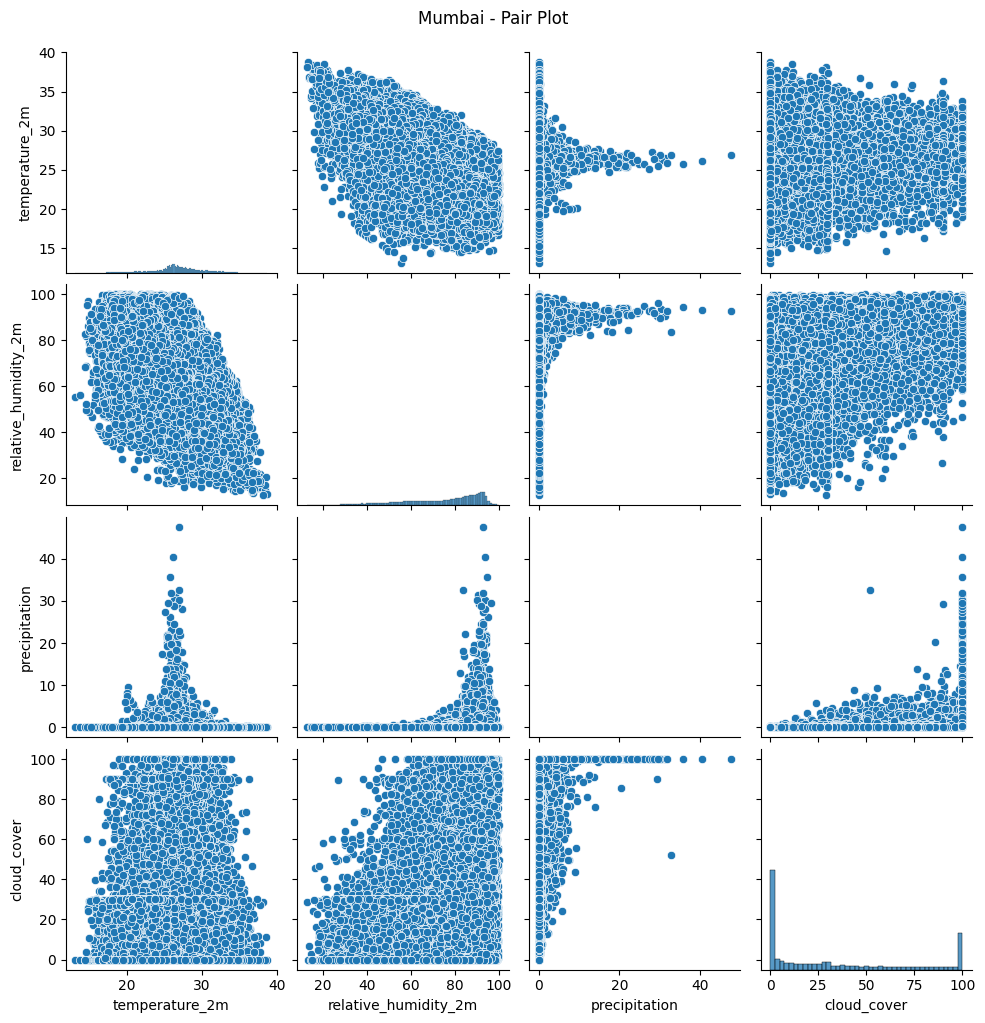

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

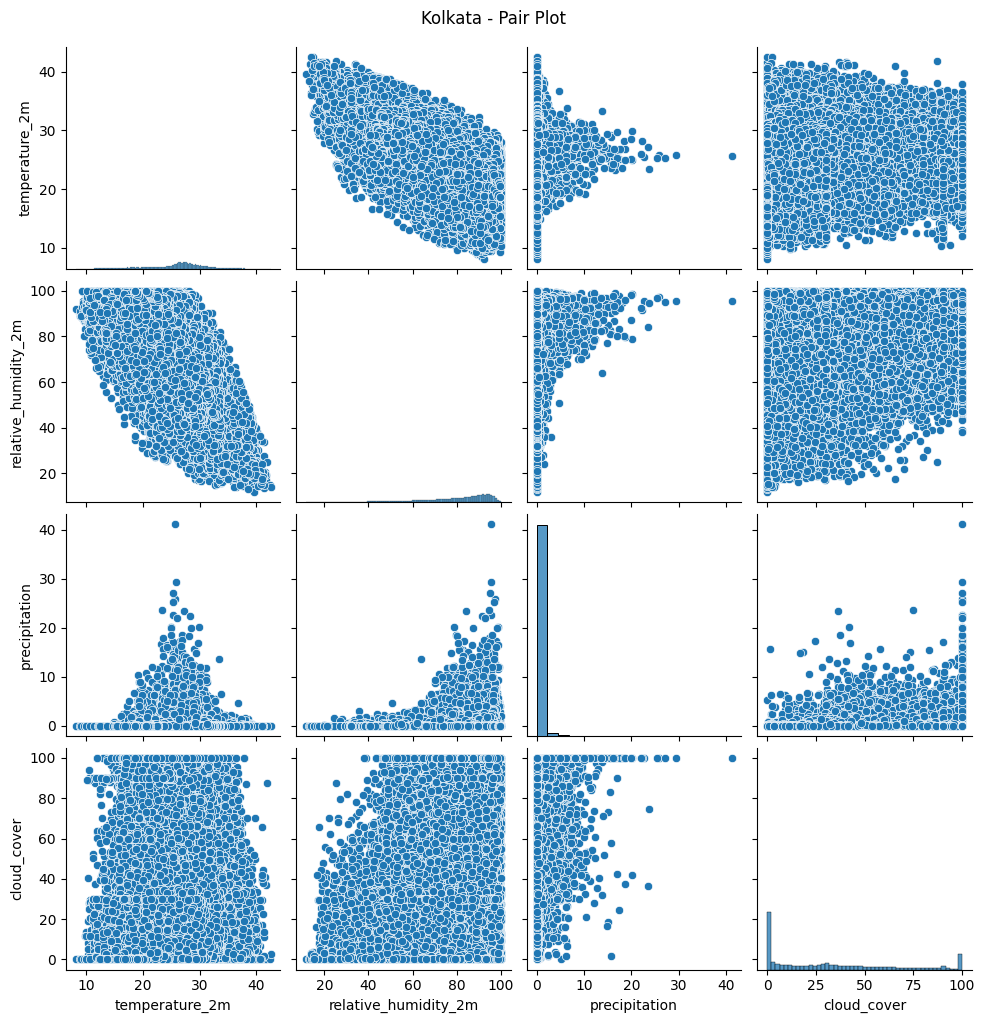

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

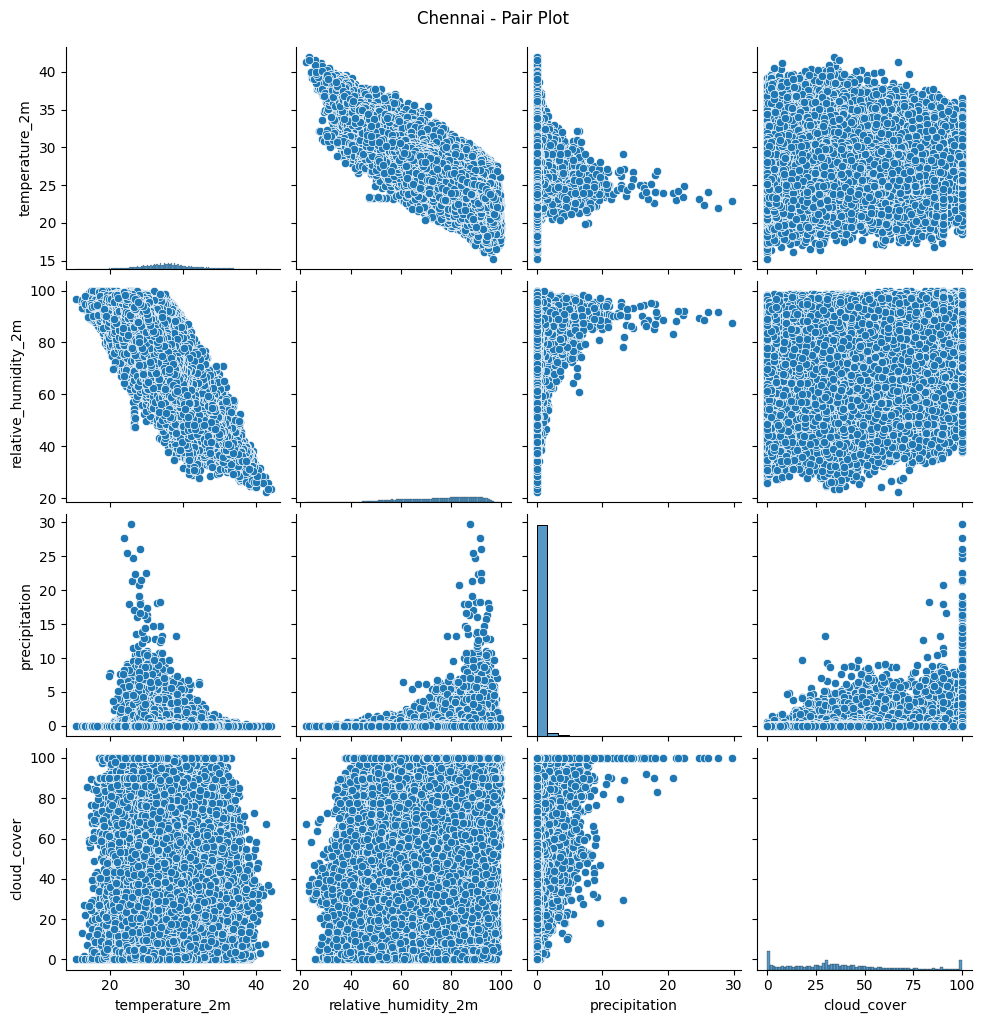

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

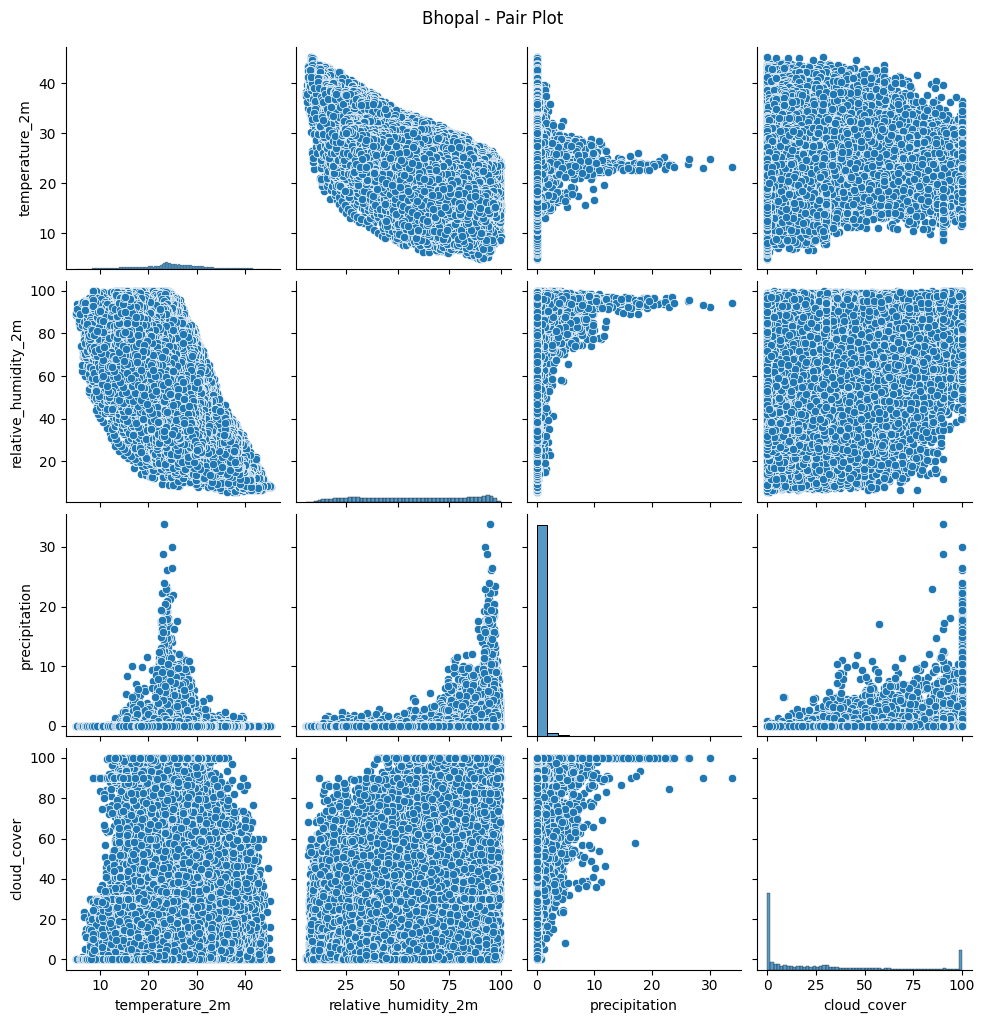

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

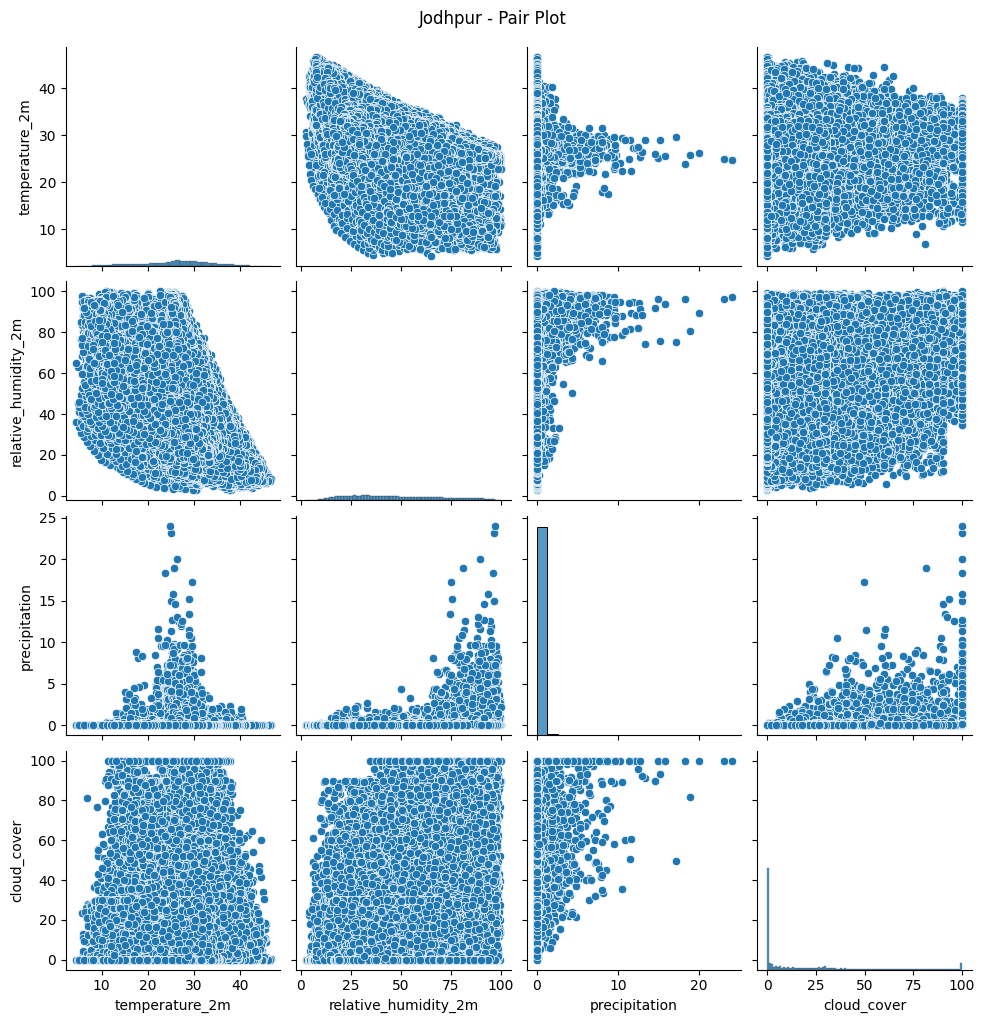

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

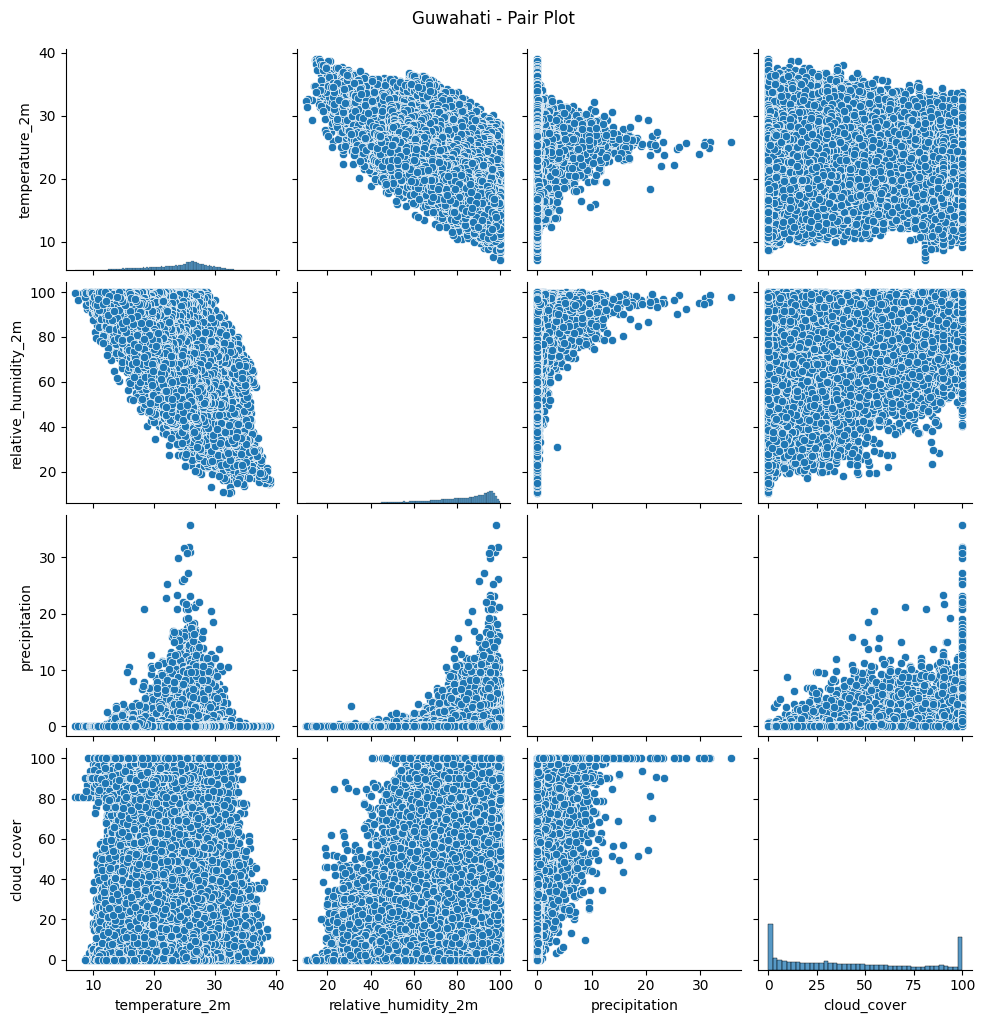

In [16]:
# Function to plot pair plots for each city
def plot_pair_plot(data, city_name):
    data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf values with NaN
    
    # Select relevant columns for pairplot
    selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover']
    
    # Check if the selected columns exist in the dataframe
    if all(col in data.columns for col in selected_columns):
        sns.pairplot(data[selected_columns])
        plt.suptitle(f'{city_name} - Pair Plot', y=1.02)  # Title for the plot
        plt.show()
    else:
        print(f"Some columns are missing in the dataset for {city_name}.")

# Loop through the datasets and plot pair plots for each city
for city_data, city_name in zip(city_datasets, city_names):
    plot_pair_plot(city_data, city_name)


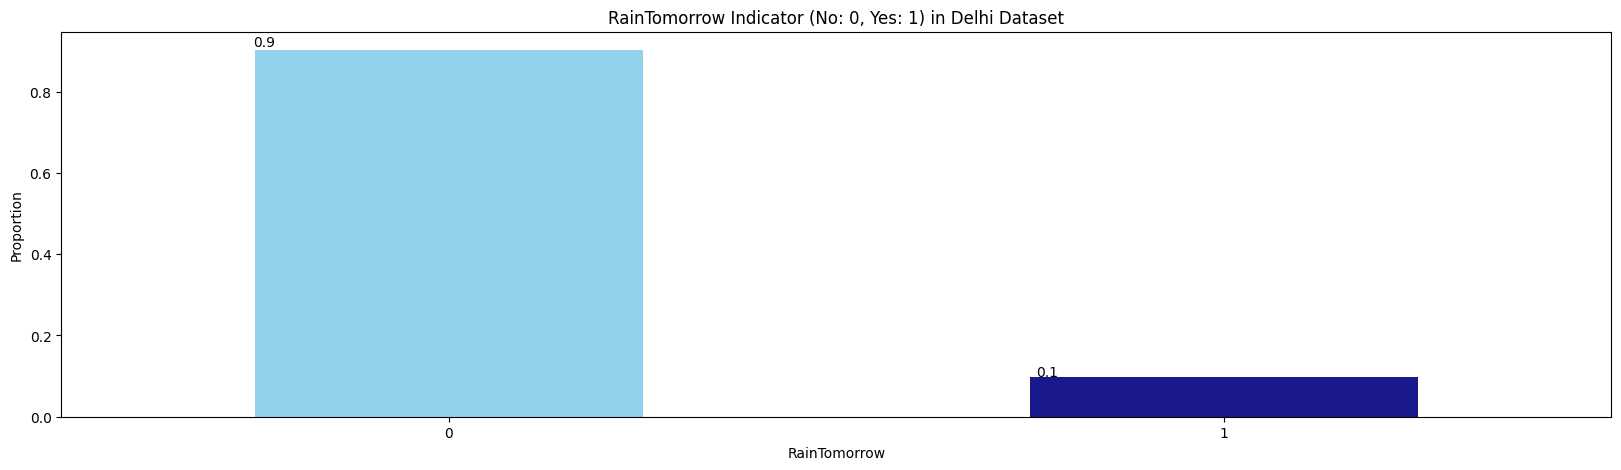

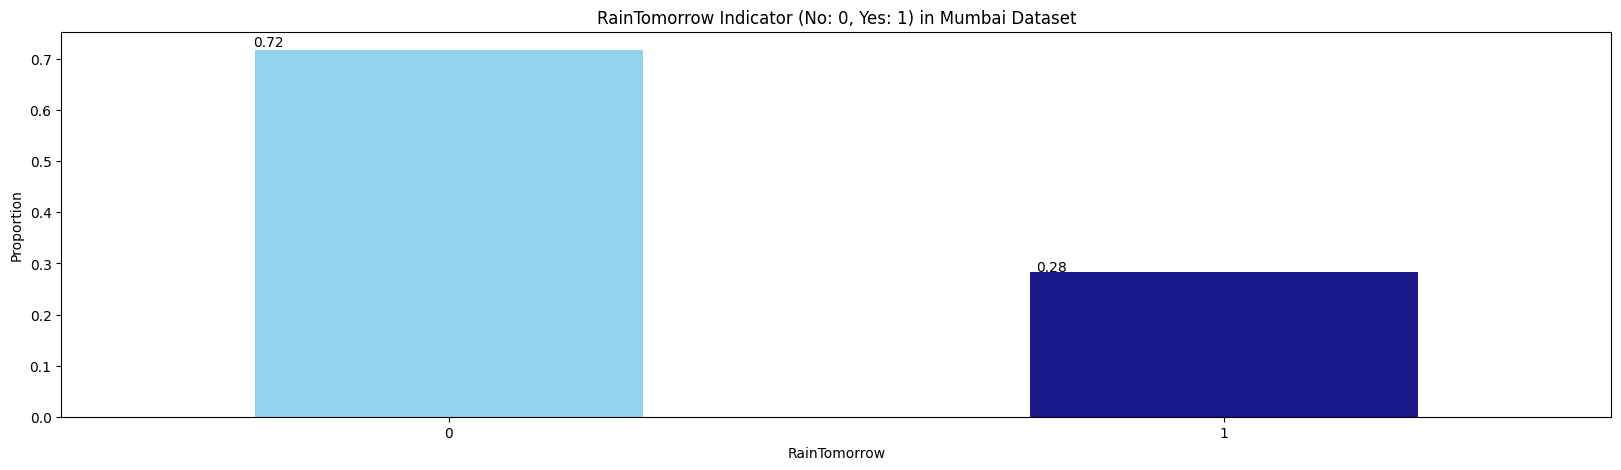

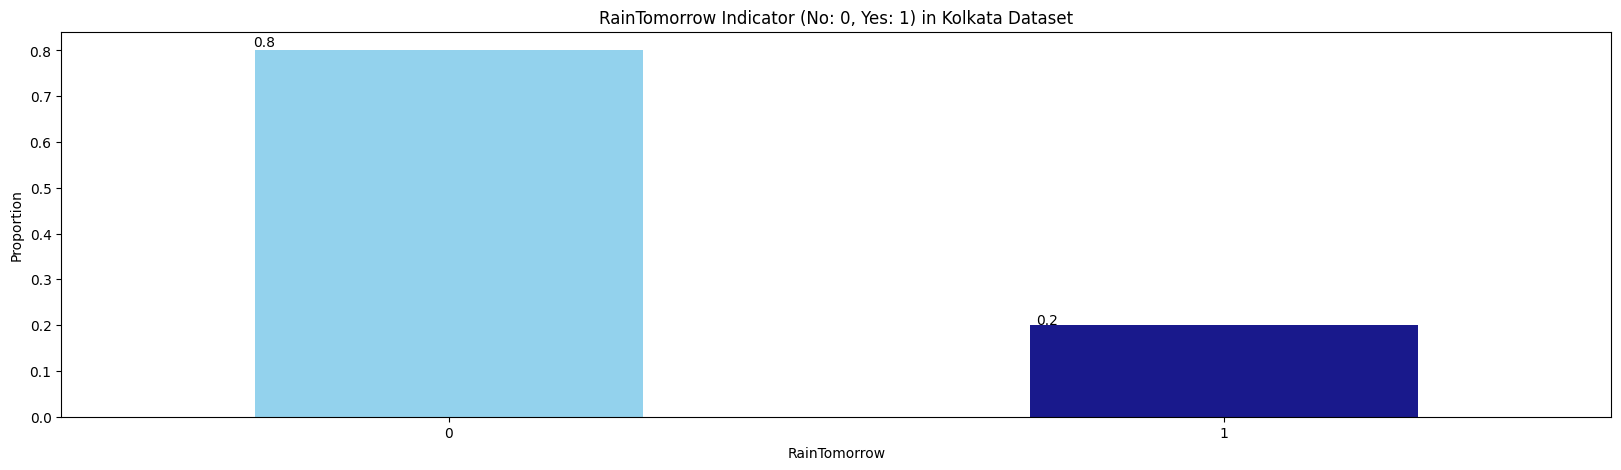

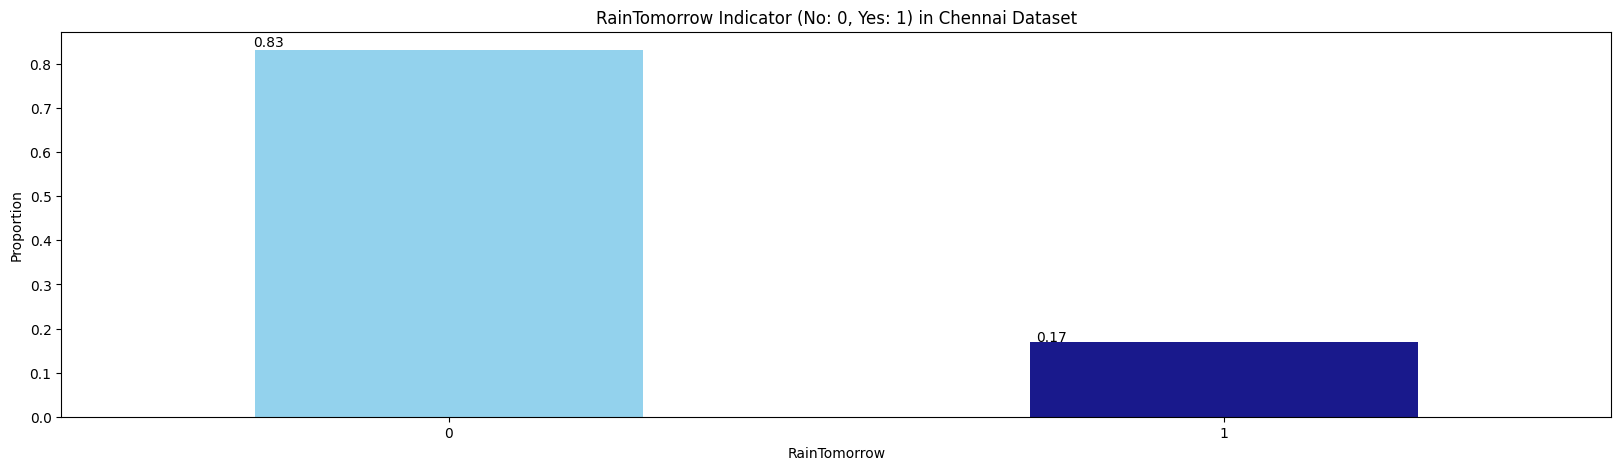

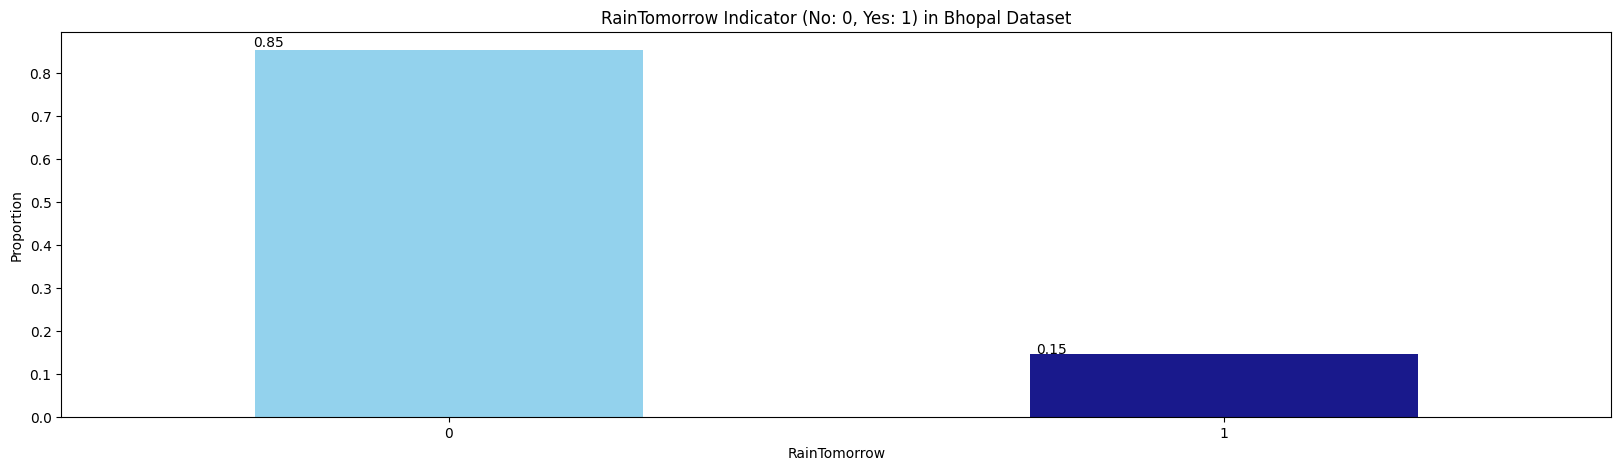

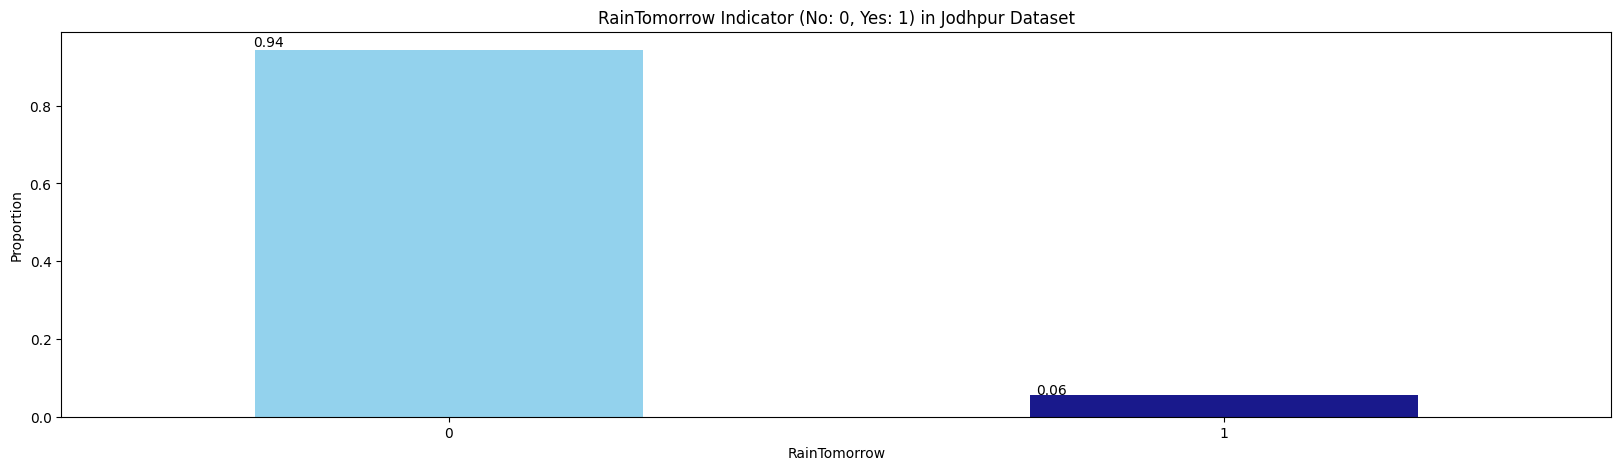

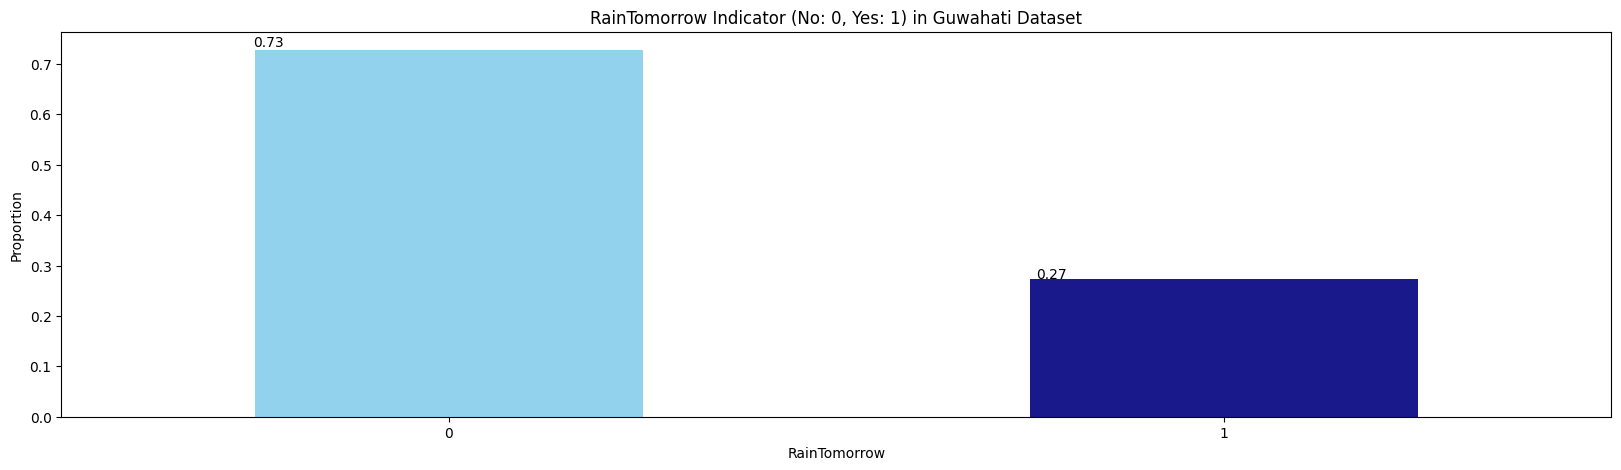

In [17]:
# Iterate over the datasets and plot RainTomorrow distribution
for city_data, city_name in zip(city_datasets, city_names):
    # Ensure 'RainTomorrow' column exists in the dataset
    if 'rain_tom' in city_data.columns:
        # Create the figure and axis for plotting
        fig = plt.figure(figsize=(20, 5))
        ax = city_data['rain_tom'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
        
        # Set the title and labels
        plt.title(f'RainTomorrow Indicator (No: 0, Yes: 1) in {city_name} Dataset')
        plt.xlabel('RainTomorrow')
        plt.ylabel('Proportion')
        
        # Annotate the bars with the values
        for p in ax.patches:
            ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
        
        # Show the plot
        plt.show()

In [ ]:
# from sklearn.utils import resample

# # List of city cleaned datasets (replace with actual city dataframes)
# city_datasets = [delhi_cleaned, mumbai_cleaned, kolkata_cleaned, chennai_cleaned, bhopal_cleaned, jodhpur_cleaned, guwahati_cleaned]
# city_names = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bhopal', 'Jodhpur', 'Guwahati']

# # Iterate over the datasets and perform oversampling for each city
# for idx, city_data in enumerate(city_datasets):
#     city_name = city_names[idx]
    
#     # Ensure 'rain_tom' column exists in the dataset
#     if 'rain_tom' in city_data.columns:
#         # Separate the dataset into 'yes' and 'no' classes based on 'rain_tom'
#         no = city_data[city_data.rain_tom == 0]
#         yes = city_data[city_data.rain_tom == 1]
        
#         # Apply oversampling to the 'yes' class to match the size of the 'no' class
#         yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
        
#         # Concatenate the oversampled 'yes' data with the 'no' data
#         oversampled = pd.concat([no, yes_oversampled])
        
#         # Update the city dataset with the oversampled data
#         city_datasets[idx] = oversampled
        
#         # Create the figure and axis for plotting
#         fig = plt.figure(figsize=(20, 5))
#         ax = oversampled['rain_tom'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
        
#         # Set the title and labels
#         plt.title(f'RainTomorrow Indicator (No: 0, Yes: 1) after Oversampling in {city_name} Dataset')
#         plt.xlabel('RainTomorrow')
#         plt.ylabel('Proportion')
        
#         # Annotate the bars with the values
#         for p in ax.patches:
#             ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
        
#         # Show the plot
#         plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Assuming 'rain_tom' and 'rain_amount_tom' are columns in your dataset
# X: Features, y1: rain_tom (binary), y2: rain_amount_tom (continuous)
data = delhi_cleaned
X = data.drop(columns=['rain_tom', 'rain_amount_tom'])  # Drop the target columns from features
y1 = data['rain_tom']  # Binary target for rain prediction
y2 = data['rain_amount_tom']  # Continuous target for amount of rain prediction

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Binary Classification for rain prediction
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y1_train)
y1_pred = clf.predict(X_test_scaled)

# Evaluate classification model
print("Classification Accuracy (Rain Tomorrow):", accuracy_score(y1_test, y1_pred))

# Model 2: Regression for predicting the amount of rain
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_scaled, y2_train)
y2_pred = reg.predict(X_test_scaled)

# Evaluate regression model
print("Regression Mean Squared Error (Amount of Rain Tomorrow):", mean_squared_error(y2_test, y2_pred))


Classification Accuracy (Rain Tomorrow): 0.9425125060513152
Regression Mean Squared Error (Amount of Rain Tomorrow): 0.1893952639684525


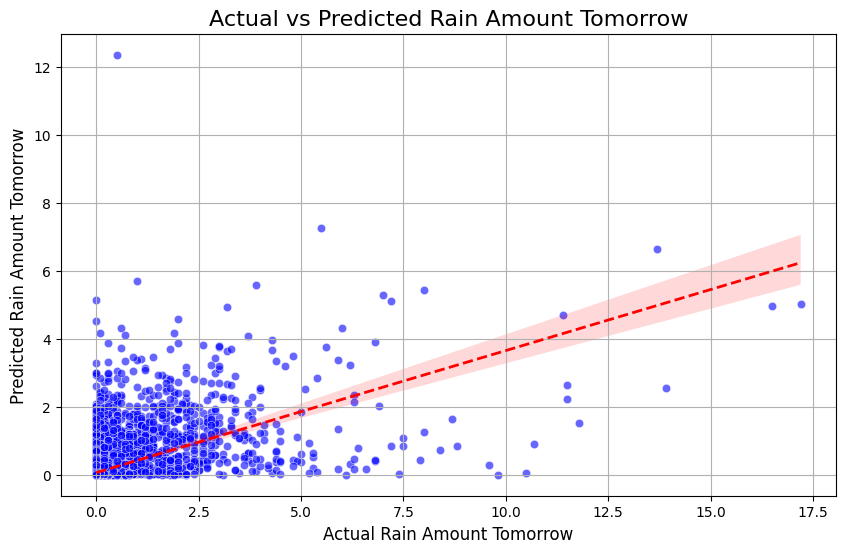

In [19]:
# Scatter plot of actual vs predicted values for rain amount tomorrow
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y2_test, y=y2_pred, color='blue', alpha=0.6)

# Adding the regression line (best fit line)
sns.regplot(x=y2_test, y=y2_pred, scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'})

# Labels and title
plt.title('Actual vs Predicted Rain Amount Tomorrow', fontsize=16)
plt.xlabel('Actual Rain Amount Tomorrow', fontsize=12)
plt.ylabel('Predicted Rain Amount Tomorrow', fontsize=12)
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_models(city_data):
    # Assuming 'rain_tom' and 'rain_amount_tom' are columns in the dataset
    # X: Features, y1: rain_tom (binary), y2: rain_amount_tom (continuous)
    X = city_data.drop(columns=['rain_tom', 'rain_amount_tom'])
    y1 = city_data['rain_tom']  # Binary target for rain prediction
    y2 = city_data['rain_amount_tom']  # Continuous target for amount of rain prediction

    # Split the data into training and testing sets
    X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model 1: Binary Classification for rain prediction
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y1_train)
    y1_pred = clf.predict(X_test_scaled)

    # Evaluate classification model
    classification_accuracy = accuracy_score(y1_test, y1_pred)
    print(f"Classification Accuracy (Rain Tomorrow) for {city_data.name}: {classification_accuracy}")

    # Model 2: Regression for predicting the amount of rain
    reg = RandomForestRegressor(random_state=42)
    reg.fit(X_train_scaled, y2_train)
    y2_pred = reg.predict(X_test_scaled)

    # Evaluate regression model
    regression_mse = mean_squared_error(y2_test, y2_pred)
    print(f"Regression Mean Squared Error (Amount of Rain Tomorrow) for {city_data.name}: {regression_mse}")

    # Plot Actual vs Predicted for regression model
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y2_test, y=y2_pred, color='blue', alpha=0.6)
    sns.regplot(x=y2_test, y=y2_pred, scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'})
    
    # Labels and title
    plt.title(f'Actual vs Predicted Rain Amount Tomorrow for {city_data.name}', fontsize=16)
    plt.xlabel('Actual Rain Amount Tomorrow', fontsize=12)
    plt.ylabel('Predicted Rain Amount Tomorrow', fontsize=12)
    plt.grid(True)
    plt.show()

    return classification_accuracy, regression_mse

--- Evaluating models for Delhi ---
Classification Accuracy (Rain Tomorrow) for Delhi: 0.9425125060513152
Regression Mean Squared Error (Amount of Rain Tomorrow) for Delhi: 0.1893952639684525


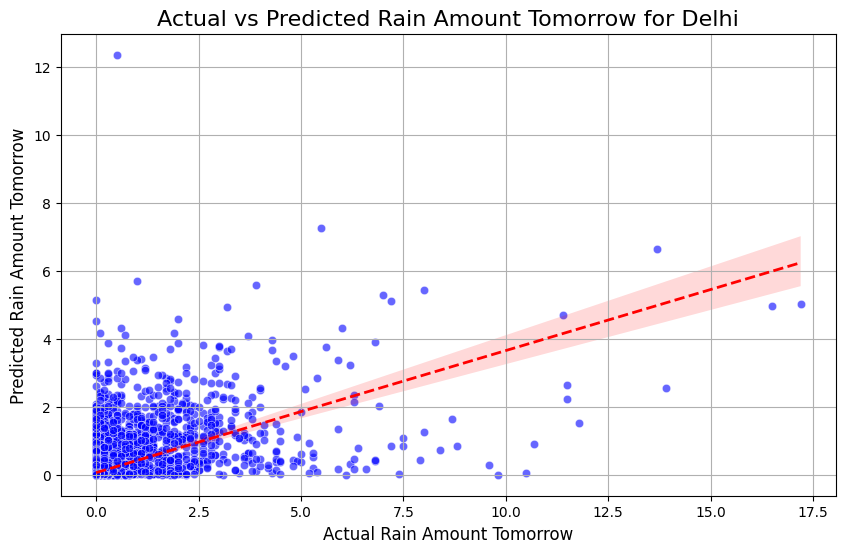

--- Results for Delhi ---
Classification Accuracy (Rain Tomorrow): 0.9425125060513152
Regression MSE (Rain Amount Tomorrow): 0.1893952639684525

--- Evaluating models for Mumbai ---
Classification Accuracy (Rain Tomorrow) for Mumbai: 0.9539293206390189
Regression Mean Squared Error (Amount of Rain Tomorrow) for Mumbai: 0.2919919859768391


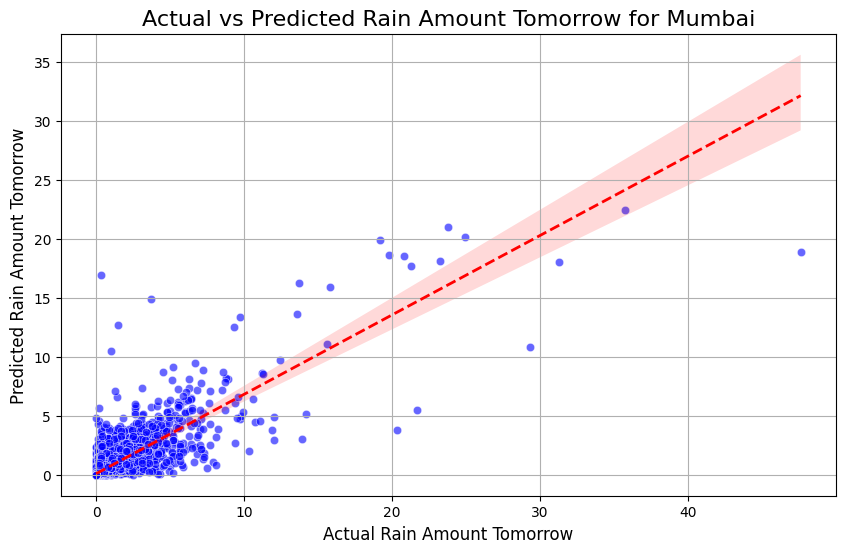

--- Results for Mumbai ---
Classification Accuracy (Rain Tomorrow): 0.9539293206390189
Regression MSE (Rain Amount Tomorrow): 0.2919919859768391

--- Evaluating models for Chennai ---
Classification Accuracy (Rain Tomorrow) for Chennai: 0.9167339035016944
Regression Mean Squared Error (Amount of Rain Tomorrow) for Chennai: 0.2039660908504115


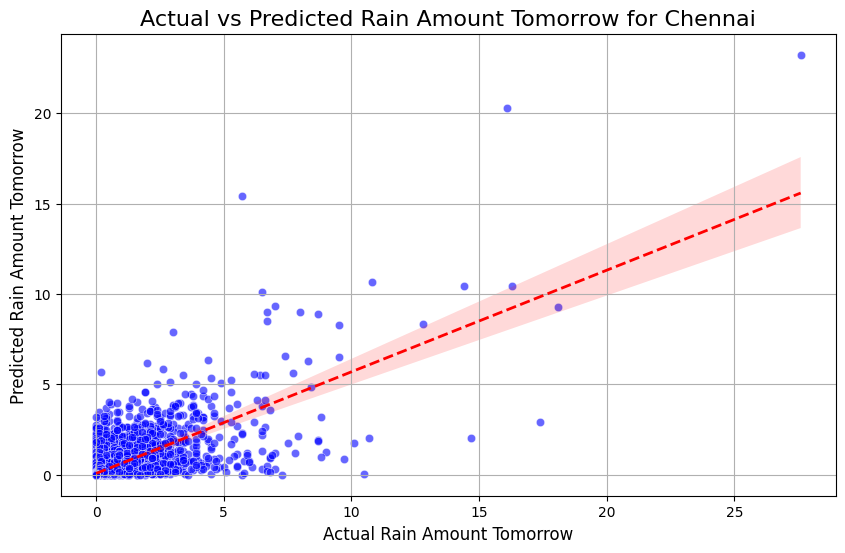

--- Results for Chennai ---
Classification Accuracy (Rain Tomorrow): 0.9167339035016944
Regression MSE (Rain Amount Tomorrow): 0.2039660908504115

--- Evaluating models for Bhopal ---
Classification Accuracy (Rain Tomorrow) for Bhopal: 0.9425528481523318
Regression Mean Squared Error (Amount of Rain Tomorrow) for Bhopal: 0.2588141294578022


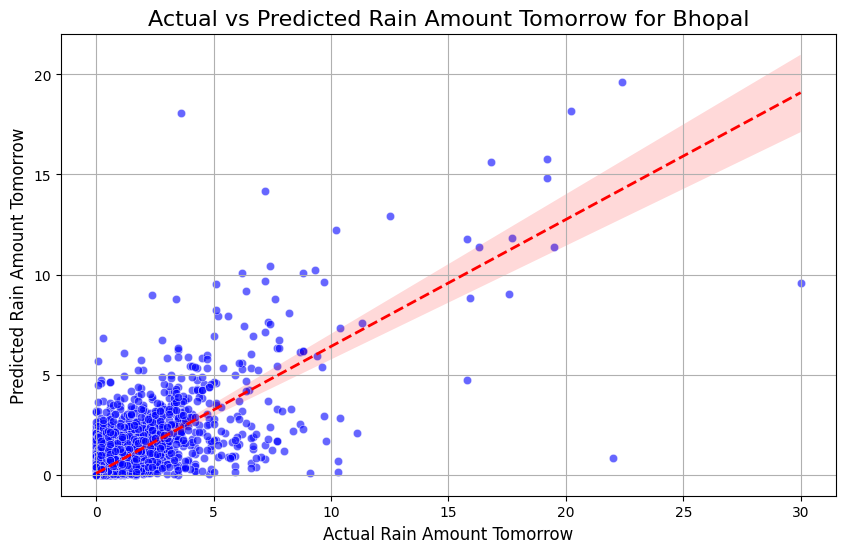

--- Results for Bhopal ---
Classification Accuracy (Rain Tomorrow): 0.9425528481523318
Regression MSE (Rain Amount Tomorrow): 0.2588141294578022

--- Evaluating models for Jodhpur ---
Classification Accuracy (Rain Tomorrow) for Jodhpur: 0.9677666612877198
Regression Mean Squared Error (Amount of Rain Tomorrow) for Jodhpur: 0.10425346151363561


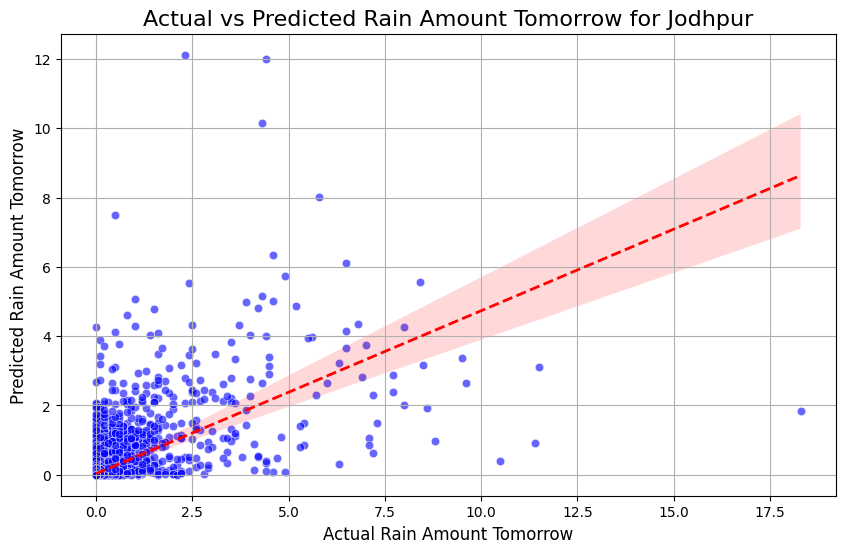

--- Results for Jodhpur ---
Classification Accuracy (Rain Tomorrow): 0.9677666612877198
Regression MSE (Rain Amount Tomorrow): 0.10425346151363561

--- Evaluating models for Kolkata ---
Classification Accuracy (Rain Tomorrow) for Kolkata: 0.914434403743747
Regression Mean Squared Error (Amount of Rain Tomorrow) for Kolkata: 0.49865775588994676


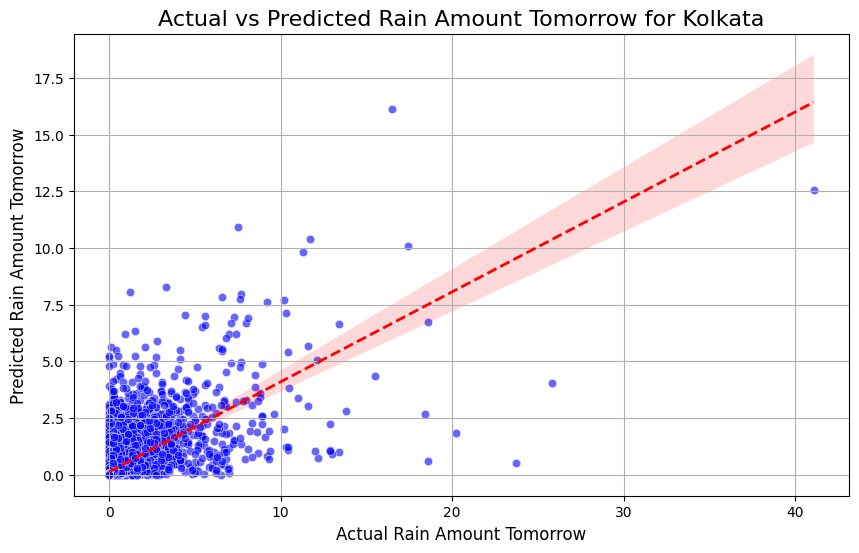

--- Results for Kolkata ---
Classification Accuracy (Rain Tomorrow): 0.914434403743747
Regression MSE (Rain Amount Tomorrow): 0.49865775588994676

--- Evaluating models for Guwahati ---
Classification Accuracy (Rain Tomorrow) for Guwahati: 0.889745037921575
Regression Mean Squared Error (Amount of Rain Tomorrow) for Guwahati: 0.6020949922139744


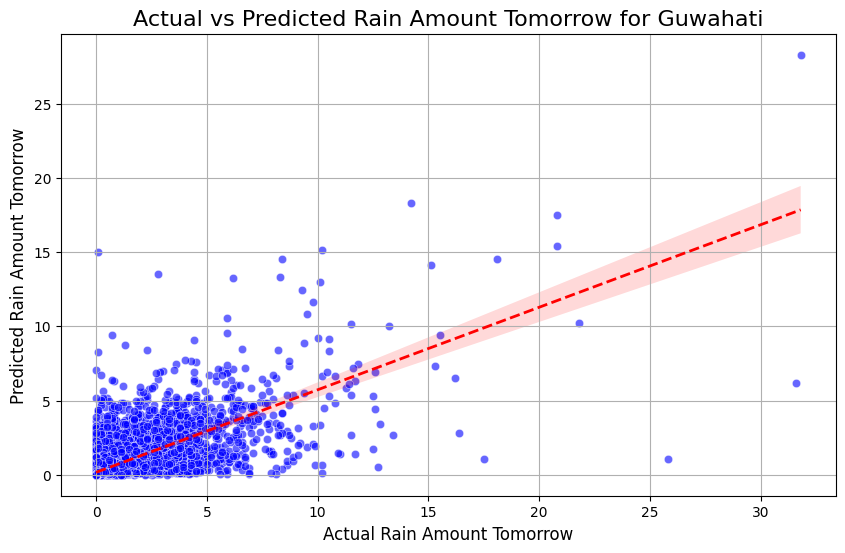

--- Results for Guwahati ---
Classification Accuracy (Rain Tomorrow): 0.889745037921575
Regression MSE (Rain Amount Tomorrow): 0.6020949922139744



In [21]:
# Assuming you have dataframes like 'delhi_cleaned', 'mumbai_cleaned', etc.
cities = [delhi_cleaned, mumbai_cleaned, chennai_cleaned, bhopal_cleaned, jodhpur_cleaned, kolkata_cleaned, guwahati_cleaned]
city_names = ['Delhi', 'Mumbai', 'Chennai', 'Bhopal', 'Jodhpur', 'Kolkata', 'Guwahati']

# Loop through each city's dataset and evaluate models
for city, city_name in zip(cities, city_names):
    print(f"--- Evaluating models for {city_name} ---")
    city_data = city.copy()  # Make a copy to preserve the original data
    city_data.name = city_name  # Add city name as an attribute for the plot
    classification_accuracy, regression_mse = train_and_evaluate_models(city_data)

    # Optionally, store or track results for further analysis
    print(f"--- Results for {city_name} ---")
    print(f"Classification Accuracy (Rain Tomorrow): {classification_accuracy}")
    print(f"Regression MSE (Rain Amount Tomorrow): {regression_mse}\n")